# Customer Churn Analysis

## Project Overview
This project aims to explore the factors influencing customer churn and uncover actionable insights. The analysis uses the Telco Customer Churn dataset. All data for this project can be found at Kaggle.com.

### Objectives
- Analyze customer data to understand churn patterns.
- Clean customer data so that it's usable for analysis.
- Identify key variables correlated with churn.
- Visualize insights for better understanding.

## Tools and Libraries
- pandas for data manipulation
- Matplotlib and Seaborn for visualizations

In [3]:
import os
import pandas as pd  # Import pandas for data manipulation

def load_csv_file(file_path: str) -> pd.DataFrame:
    """
    Loads a CSV file into a pandas DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The DataFrame containing the CSV data.

    Raises:
        FileNotFoundError: If the file does not exist at the specified path.
    """
    try:
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        return df
    except FileNotFoundError as e:
        raise FileNotFoundError(f"File not found. Please check the path: {file_path}") from e

# Check the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


file_path = 'C:/Users/WILLS/customer-churn-analysis/Data/telco-customer-churn.csv'  # Update with the correct file name and extension
if os.path.isfile(file_path):
    print("File exists.")
else:
    print("File not found. Please check the path.")

Current Working Directory: C:\Users\WILLS\customer-churn-analysis\Notebooks
File exists.


In [4]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
df = pd.read_csv('C:/Users/WILLS/customer-churn-analysis/Data/telco-customer-churn.csv')  # Read the CSV file into a DataFrame
print(df.head())  # Display the first five rows of the DataFrame to get an overview of the data
print(df.info())  # Print a concise summary of the DataFrame, including the number of non-null entries and data types
print(df.describe())  # Generate descriptive statistics for numerical columns in the DataFrame
print(df.isnull().sum())  # Count and display the number of missing values in each column of the DataFrame

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# This section is included if any data cleansing needs to occur or you'd like to isolate data for a clearer picture

# Convert the 'TotalCharges' column to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values in 'TotalCharges' with the median of the column
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop rows where 'TotalCharges' is still NaN after filling
df.dropna(subset=['TotalCharges'], inplace=True)

# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Map 'Churn' values from categorical to numerical (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert 'PaymentMethod' to a categorical type and then to numerical codes
df['PaymentMethod'] = df['PaymentMethod'].astype('category').cat.codes

# Drop unnecessary columns from the DataFrame
df.drop(['CustomerID', 'SomeOtherColumn'], axis=1, inplace=True)

# Convert 'City' names to title case for consistency
df['City'] = df['City'].str.title()  # Converts to title case
# Convert 'City' names to lowercase for uniformity
df['City'] = df['City'].str.lower()  # Converts to lowercase

# Save the cleaned DataFrame to a CSV file without the index
df.to_csv('data/telco_customer_churn_cleaned.csv', index=False)

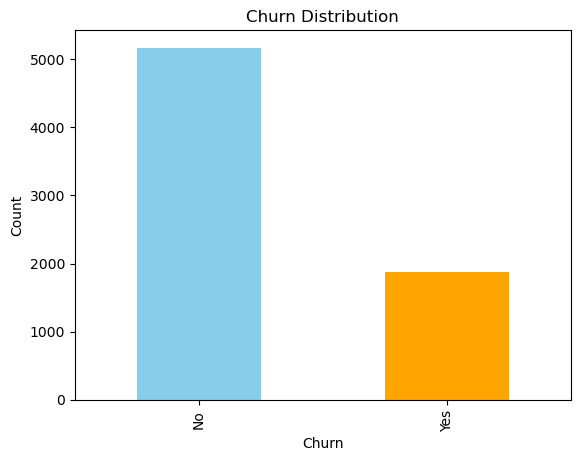

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset from the specified CSV file
df = pd.read_csv('C:/Users/WILLS/customer-churn-analysis/Data/telco-customer-churn.csv')

# Distribution of churn
# Count the occurrences of each churn status (Yes/No)
churn_counts = df['Churn'].value_counts()
# Create a bar plot to visualize the churn distribution
churn_counts.plot(kind='bar', title='Churn Distribution', color=['skyblue', 'orange'])
plt.xlabel('Churn')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the plot

C:\Users\WILLS\AppData\Local\Temp\ipykernel_37084\2310239951.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y="MonthlyCharges", data=df, palette= "viridis", legend = False)


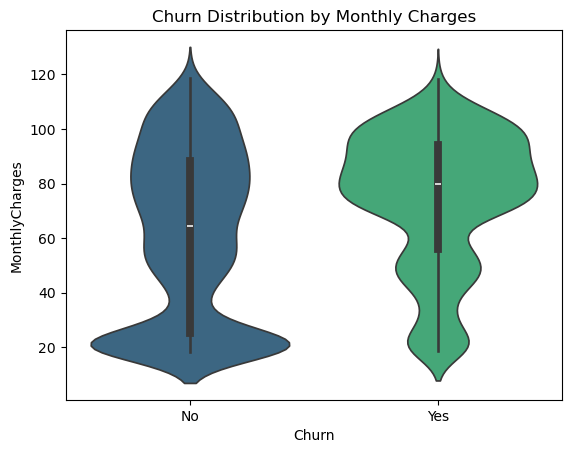

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


# Load the dataset from the specified CSV file
df = pd.read_csv('C:/Users/WILLS/customer-churn-analysis/Data/telco-customer-churn.csv')

# Create a violin plot to visualize the distribution of Monthly Charges based on Churn status
sns.violinplot(x="Churn", y="MonthlyCharges", data=df, palette= "viridis", legend = False)
plt.title("Churn Distribution by Monthly Charges")  # Title for the violin plot
plt.show()  # Display the violin plot

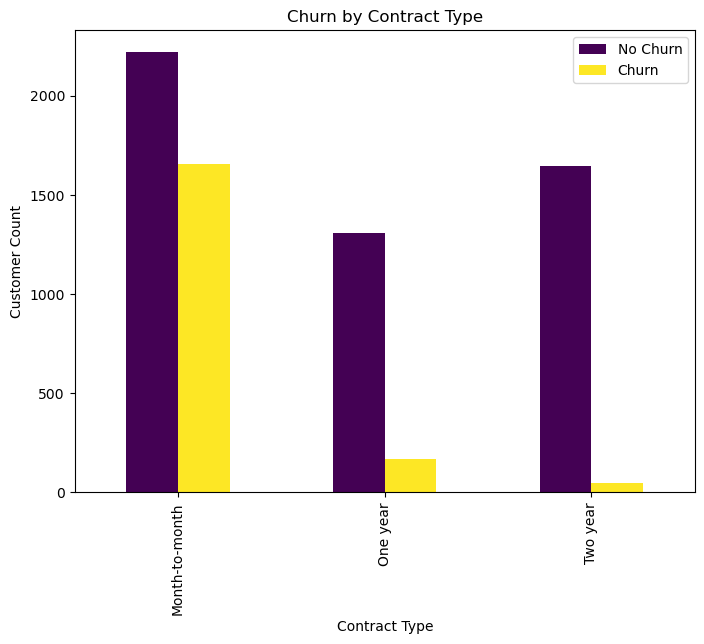

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset from the specified CSV file
df = pd.read_csv('C:/Users/WILLS/customer-churn-analysis/Data/telco-customer-churn.csv')

# Group the data by Contract type and Churn status, then count the occurrences
contract_churn = df.groupby(["Contract", "Churn"]).size().unstack()
# Create a bar plot to visualize the number of customers who churned based on contract type
contract_churn.plot(kind="bar", stacked=False, figsize=(8, 6), colormap="viridis")
plt.title("Churn by Contract Type")  # Title for the bar plot
plt.xlabel("Contract Type")  # Label for the x-axis
plt.ylabel("Customer Count")  # Label for the y-axis
plt.legend(["No Churn", "Churn"])  # Legend to differentiate between churned and non-churned customers
plt.show()  # Display the plot

C:\Users\WILLS\AppData\Local\Temp\ipykernel_37084\818181054.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust layout to prevent clipping
C:\Users\WILLS\AppData\Local\Temp\ipykernel_37084\818181054.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust layout to prevent clipping
C:\Users\WILLS\AppData\Local\Temp\ipykernel_37084\818181054.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust layout to prevent clipping


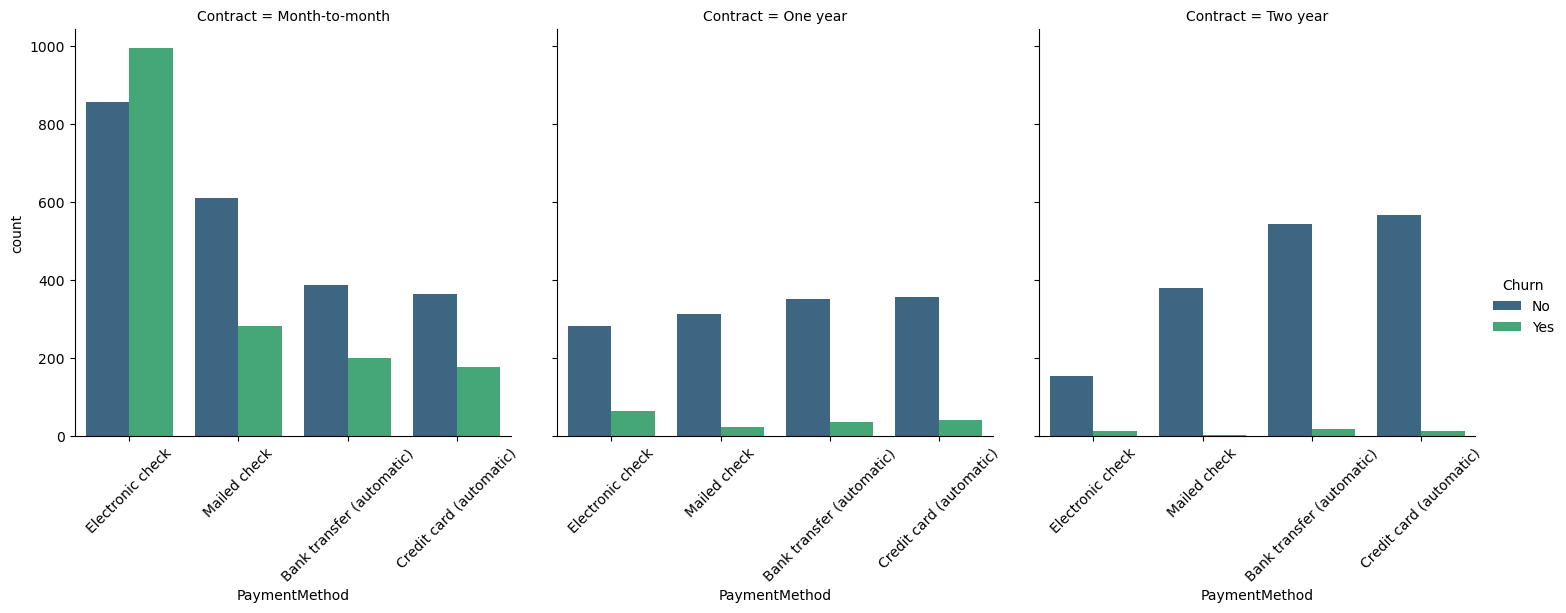

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the dataset from the specified CSV file
df = pd.read_csv('C:/Users/WILLS/customer-churn-analysis/Data/telco-customer-churn.csv')

# Catplot for Churn by PaymentMethod and Contract type
g = sns.catplot(x='PaymentMethod', hue='Churn', col='Contract', kind='count', data=df, palette='viridis')
for ax in g.axes.flat:

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust layout to prevent clipping
plt.show()